<a href="https://colab.research.google.com/github/DicheDiez10/CSCI-191-T-ML/blob/main/Assignment_Linear_and_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Background:

In this assignment we will combine our work with __<font color='red'>Linear Regression and Logistic regression</font>__ into a single notebook illustrating both algorithms and their connections.  Illustrate __<font color='red'>Logistic Regression</font>__ with both the __<font color='red'>Squared Error derived gradient and the Cross-Entropy derived gradient</font>__.  Use all the existing datasets, and also use your own algorithm to learn to classify the attached full IRIS dataset with features:
<br>
1. sepal length in cm <br>
2. sepal width in cm <br>
3. petal length in cm <br>
4. petal width in cm <br>
5. class: <br>
  -- Iris Setosa <br>
  -- Iris Versicolour <br>
  -- Iris Virginica <br>

In [180]:
#libraries
import random
import pandas as pd
import numpy as np
from sklearn import datasets
from math import ceil

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sb

####**First we need to import the data from the csv file we were given**


In [103]:
#setting the csv file data into 'iris_data_set'

#pulling from the github public file
iris_data_set = pd.read_csv('https://raw.githubusercontent.com/DicheDiez10/CSCI-191-T-ML/main/iris.data.csv', header = None, 
                            names = ['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm', 'petal_width_cm', 'classification'])


#print(iris_data_set)
#Testing to see we can grab the information
iris_data_set.head()



,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


##Information further regarding the data set we are working with

In [104]:
iris_data_set.info()

print("\n","---------------------------------------------------------------------", "\n")
print(" ---------------------------------------------------------------------", "\n")
print ("\n", "Description of the data set: \n")

iris_data_set.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  150 non-null    float64
 1   sepal_width_cm   150 non-null    float64
 2   petal_length_cm  150 non-null    float64
 3   petal_width_cm   150 non-null    float64
 4   classification   150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB

 --------------------------------------------------------------------- 

 --------------------------------------------------------------------- 


 Description of the data set: 



,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Graphs to show initial comparison by flower type (classification)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


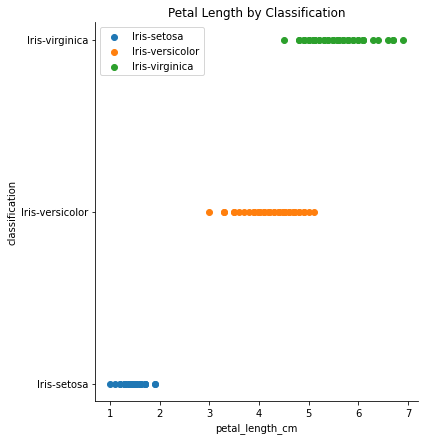

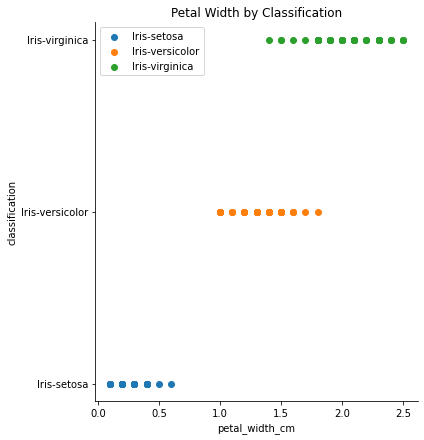

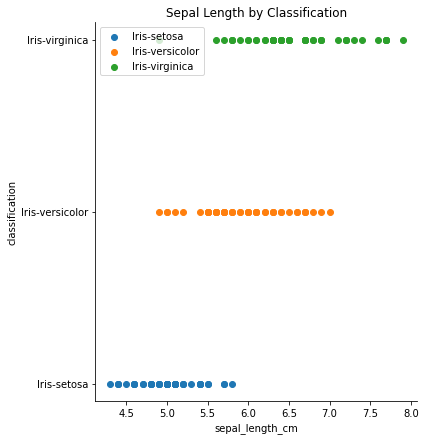

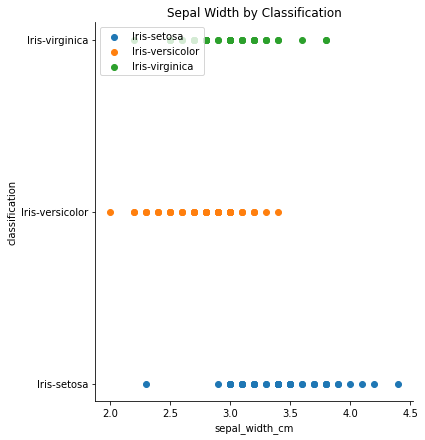

In [105]:
petalPlt = sb.FacetGrid(iris_data_set, hue='classification', size=6).map(plt.scatter, 'petal_length_cm', 'classification')
plt.legend(loc='upper left');
plt.title("Petal Length by Classification");


petalPlt = sb.FacetGrid(iris_data_set, hue='classification', size=6).map(plt.scatter, 'petal_width_cm', 'classification')
plt.legend(loc='upper left');
plt.title("Petal Width by Classification");

petalPlt = sb.FacetGrid(iris_data_set, hue='classification', size=6).map(plt.scatter, 'sepal_length_cm', 'classification')
plt.legend(loc='upper left');
plt.title("Sepal Length by Classification");


petalPlt = sb.FacetGrid(iris_data_set, hue='classification', size=6).map(plt.scatter, 'sepal_width_cm', 'classification')
plt.legend(loc='upper left');
plt.title("Sepal Width by Classification");

##short comparisons between the petals and sepals themselves
 

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


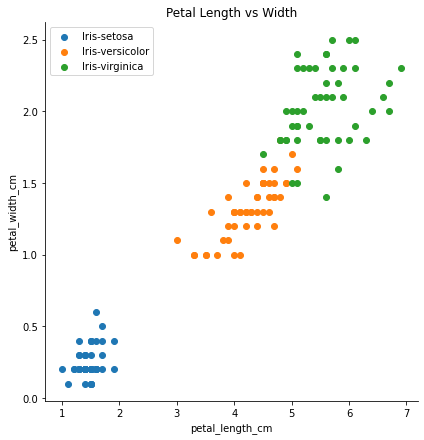

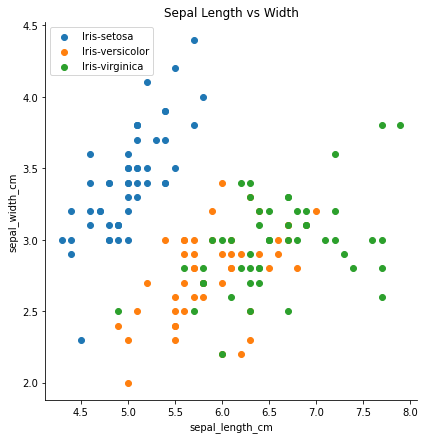

In [106]:
petalPlt = sb.FacetGrid(iris_data_set, hue='classification', size=6).map(plt.scatter, 'petal_length_cm', 'petal_width_cm')
plt.legend(loc='upper left');
plt.title("Petal Length vs Width");


petalPlt = sb.FacetGrid(iris_data_set, hue='classification', size=6).map(plt.scatter, 'sepal_length_cm', 'sepal_width_cm')
plt.legend(loc='upper left');
plt.title("Sepal Length vs Width");

#Linear Regression on this data set <br>
#### __Based on previous linear regression assignment in the class__ <br>
#### Petal Length vs Pred <br>
#### Petal Width vs Pred <br>
#### Sepal Length vs Pred <br>
#### Sepal Width vs Pred <br>


In [107]:
#First we need to get the different sets for what we are looking for in terms of 
#Data_Petal_L
#Data_Petal_W
#Data_Sepal_L
#Data_Sepal_W

iris_data_set_list = iris_data_set.values.tolist()

Data_Petal_L = [ ((1,sl,sw,pw, classif), pl) for (sl,sw,pl,pw,classif) in iris_data_set_list]
Data_Petal_W = [ ((1,sl,sw,pw, classif), pw) for (sl,sw,pl,pw,classif) in iris_data_set_list]
Data_Sepal_L = [ ((1,sl,pl,pw, classif), sl) for (sl,sw,pl,pw,classif) in iris_data_set_list]
Data_Sepal_W = [ ((1,sl,pl,pw, classif), sw) for (sl,sw,pl,pw,classif) in iris_data_set_list]

Adding the number for each classification flower type to the data


In [108]:
classification_toNum_PL = [flower for ((_,_,_,_, flower), _) in Data_Petal_L]
classification_toNum_PW = [flower for ((_,_,_,_, flower), _) in Data_Petal_W]
classification_toNum_SL = [flower for ((_,_,_,_, flower), _) in Data_Sepal_L]
classification_toNum_SW = [flower for ((_,_,_,_, flower), _) in Data_Sepal_W]

determine_the_class_number_PL =  [(1) if flow == 'Iris-setosa' else (2) if flow == 'Iris-versicolor' else (3) if flow == 'Iris-virginica' else (0) for flow in classification_toNum_PL ]
determine_the_class_number_PW =  [(1) if flow == 'Iris-setosa' else (2) if flow == 'Iris-versicolor' else (3) if flow == 'Iris-virginica' else (0) for flow in classification_toNum_PW ]
determine_the_class_number_SL =  [(1) if flow == 'Iris-setosa' else (2) if flow == 'Iris-versicolor' else (3) if flow == 'Iris-virginica' else (0) for flow in classification_toNum_SL ]
determine_the_class_number_SW =  [(1) if flow == 'Iris-setosa' else (2) if flow == 'Iris-versicolor' else (3) if flow == 'Iris-virginica' else (0) for flow in classification_toNum_SW ]

zips the sets of classifications with the datasets to get the datasets for each specific set we want (petal length, petal width, sepal length, sepal width)


In [109]:
Set_Data_Petal_L = [((tuple_vals[0], tuple_vals[1], tuple_vals[2], tuple_vals[3], FlowerType), petal_len) for ( (tuple_vals, petal_len) , (FlowerType)) in zip(Data_Petal_L, determine_the_class_number_PL)]
Set_Data_Petal_W = [((tuple_vals[0], tuple_vals[1], tuple_vals[2], tuple_vals[3], FlowerType), petal_wid) for ( (tuple_vals, petal_wid) , (FlowerType)) in zip(Data_Petal_W, determine_the_class_number_PW)]
Set_Data_Sepal_L = [((tuple_vals[0], tuple_vals[1], tuple_vals[2], tuple_vals[3], FlowerType), sepal_len) for ( (tuple_vals, sepal_len) , (FlowerType)) in zip(Data_Sepal_L, determine_the_class_number_SL)]
Set_Data_Sepal_W = [((tuple_vals[0], tuple_vals[1], tuple_vals[2], tuple_vals[3], FlowerType), sepal_wid) for ( (tuple_vals, sepal_wid) , (FlowerType)) in zip(Data_Sepal_W, determine_the_class_number_SW)]

tests the outputs to see into each set

In [110]:
print(Set_Data_Petal_L)
print(Set_Data_Petal_W)
print(Set_Data_Sepal_L)
print(Set_Data_Sepal_W)

[((1, 5.1, 3.5, 0.2, 1), 1.4), ((1, 4.9, 3.0, 0.2, 1), 1.4), ((1, 4.7, 3.2, 0.2, 1), 1.3), ((1, 4.6, 3.1, 0.2, 1), 1.5), ((1, 5.0, 3.6, 0.2, 1), 1.4), ((1, 5.4, 3.9, 0.4, 1), 1.7), ((1, 4.6, 3.4, 0.3, 1), 1.4), ((1, 5.0, 3.4, 0.2, 1), 1.5), ((1, 4.4, 2.9, 0.2, 1), 1.4), ((1, 4.9, 3.1, 0.1, 1), 1.5), ((1, 5.4, 3.7, 0.2, 1), 1.5), ((1, 4.8, 3.4, 0.2, 1), 1.6), ((1, 4.8, 3.0, 0.1, 1), 1.4), ((1, 4.3, 3.0, 0.1, 1), 1.1), ((1, 5.8, 4.0, 0.2, 1), 1.2), ((1, 5.7, 4.4, 0.4, 1), 1.5), ((1, 5.4, 3.9, 0.4, 1), 1.3), ((1, 5.1, 3.5, 0.3, 1), 1.4), ((1, 5.7, 3.8, 0.3, 1), 1.7), ((1, 5.1, 3.8, 0.3, 1), 1.5), ((1, 5.4, 3.4, 0.2, 1), 1.7), ((1, 5.1, 3.7, 0.4, 1), 1.5), ((1, 4.6, 3.6, 0.2, 1), 1.0), ((1, 5.1, 3.3, 0.5, 1), 1.7), ((1, 4.8, 3.4, 0.2, 1), 1.9), ((1, 5.0, 3.0, 0.2, 1), 1.6), ((1, 5.0, 3.4, 0.4, 1), 1.6), ((1, 5.2, 3.5, 0.2, 1), 1.5), ((1, 5.2, 3.4, 0.2, 1), 1.4), ((1, 4.7, 3.2, 0.2, 1), 1.6), ((1, 4.8, 3.1, 0.2, 1), 1.6), ((1, 5.4, 3.4, 0.4, 1), 1.5), ((1, 5.2, 4.1, 0.1, 1), 1.5), ((1, 5.5,

##__now we have the sets for doing the linear regression for each desired criteria__

In [111]:
#initial alphas
alpha_PL = 0.01
alpha_PW = 0.01
alpha_SL = 0.01
alpha_SW = 0.01

#initial models
Model_PL = [0,0,0,0,0]
Model_PW = [0,0,0,0,0]
Model_SL = [0,0,0,0,0]
Model_SW = [0,0,0,0,0]

errors_PL = []
errors_PW = []
errors_SL = []
errors_SW = []

linear text function defining based on the code from linear regression assignment

In [112]:
F = lambda W, X: sum([w*x for w,x in zip(W,X)])

def Linear_Regression_Func(alpha, model_set, data_set, desired_iterations_of_function):
  X = [x for (x,y) in data_set]
  Y = [y for (x,y) in data_set]

  #here we calculate ypredicted amount of times desired_iterations
  #amount of times to simplify manual iterations
  for num_it in range(desired_iterations_of_function):
    yPredicted = [F(model_set, x) for x in X]


    # Gradient function from previous linear reg. assignment
    # example from the linear reg. assignment: deltaX0 = 1/len(Y)*sum( [(-2*(r-y)*x[0])   for r,y,x in zip(Y, yPredicted, X)] )
    GradientFunc = lambda model, X, Y, var:              1/len(Y)*sum( [(-2*(r-y)*x[var]) for r,y,x in zip(Y, yPredicted, X)])

    for it in range(len(model_set)):
      #updating the delta, which is found from using gradient descent
      delta = GradientFunc(model_set, X, Y, it) #using above information
      #deltaX0 = 1/len(Y)*sum( [(-2*(r-y)*x[0])   for r,y,x in zip(Y, yPredicted, X)] )
      #deltaX1 = 1/len(Y)*sum( [(-2*(r-y)*x[1])   for r,y,x in zip(Y, yPredicted, X)] )
      #deltaX2 = 1/len(Y)*sum( [(-2*(r-y)*x[2])   for r,y,x in zip(Y, yPredicted, X)] )
      #deltaX3 = 1/len(Y)*sum( [(-2*(r-y)*x[3])   for r,y,x in zip(Y, yPredicted, X)] )
      #deltaX4 = 1/len(Y)*sum( [(-2*(r-y)*x[4])   for r,y,x in zip(Y, yPredicted, X)] )
      
      #example from linear reg. assignment: : model = [model[0]-alpha*deltaX0, model[1]-alpha*deltaX1]
      #model_set = [model_set[0]-alpha*deltaX0, model_set[1]-alpha*deltaX1, model_set[2]-alpha*deltaX2, model_set[3]-alpha*deltaX3, model_set[4]-alpha*deltaX4]
      model_set[it] = model_set[it] - alpha * delta
  return model_set
    
    
  





outputting the model based on n = 500 iterations to test


In [113]:
Model_PL = Linear_Regression_Func(alpha_PL, Model_PL, Set_Data_Petal_L, 500)
print("Model for Petal Length: ", Model_PL , "\n ---------------------------------- \n")

Model_PW = Linear_Regression_Func(alpha_PW, Model_PW, Set_Data_Petal_W, 500)
print("Model for Petal Width: ", Model_PW , "\n ---------------------------------- \n")

Model_SL = Linear_Regression_Func(alpha_SL, Model_SL, Set_Data_Sepal_L, 500)
print("Model for Sepal Length: ", Model_SL , "\n ---------------------------------- \n")

Model_SW = Linear_Regression_Func(alpha_SW, Model_SW, Set_Data_Sepal_W, 500)
print("Model for Sepal Width: ", Model_SW , "\n ---------------------------------- \n")

Model for Petal Length:  [-0.1321583447504078, 0.5506725049374765, -0.5765656876928108, 0.8883790920052383, 0.6880259105319115] 
 ---------------------------------- 

Model for Petal Width:  [-0.07562500005563269, 0.04782307343206961, -0.10691040905182679, 0.5782968560062914, 0.31566190741287403] 
 ---------------------------------- 

Model for Sepal Length:  [0.18702343788113193, 0.9513583303241973, 0.028443355218406945, -0.0587973660267677, 0.031257369000936785] 
 ---------------------------------- 

Model for Sepal Width:  [0.26078659548871397, 0.723588603560789, -0.4163816036775138, 0.0095300302252877, 0.05598544678341268] 
 ---------------------------------- 



combining all actual vs predicted pairs to have a combined table that we can output


In [114]:
FlowerClass = iris_data_set.values.tolist()
FlowerClassTxt = [flower for (val1, val2, val3, val4, flower) in FlowerClass]

XPL = [x for (x,y) in Set_Data_Petal_L]
YPL = [y for (x,y) in Set_Data_Petal_L]

XPW = [x for (x,y) in Set_Data_Petal_W]
YPW = [y for (x,y) in Set_Data_Petal_W]

XSL = [x for (x,y) in Set_Data_Sepal_L]
YSL = [y for (x,y) in Set_Data_Sepal_L]

XSW = [x for (x,y) in Set_Data_Sepal_W]
YSW = [y for (x,y) in Set_Data_Sepal_W]

yPredictedPL = [F(Model_PL, x) for x in XPL]
yPredictedPW = [F(Model_PW, x) for x in XPW]
yPredictedSL = [F(Model_SL, x) for x in XSL]
yPredictedSW = [F(Model_SW, x) for x in XSW]

print(YPL)
print(yPredictedPL)
PL_act_vs_pred = list(zip(YPL, yPredictedPL))
PW_act_vs_pred = list(zip(YPW, yPredictedPW))
SL_act_vs_pred = list(zip(YSL, yPredictedSL))
SW_act_vs_pred = list(zip(YSW, yPredictedSW))

ClassificationFlower = list(FlowerClassTxt)

All_act_vs_pred = list(zip(YPL, yPredictedPL, YPW, yPredictedPW, YSL, yPredictedSL, YSW, yPredictedSW, ClassificationFlower))

[1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4, 1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1.0, 1.7, 1.9, 1.6, 1.6, 1.5, 1.4, 1.6, 1.6, 1.5, 1.5, 1.4, 1.5, 1.2, 1.3, 1.5, 1.3, 1.5, 1.3, 1.3, 1.3, 1.6, 1.9, 1.4, 1.6, 1.4, 1.5, 1.4, 4.7, 4.5, 4.9, 4.0, 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 3.5, 4.2, 4.0, 4.7, 3.6, 4.4, 4.5, 4.1, 4.5, 3.9, 4.8, 4.0, 4.9, 4.7, 4.3, 4.4, 4.8, 5.0, 4.5, 3.5, 3.8, 3.7, 3.9, 5.1, 4.5, 4.5, 4.7, 4.4, 4.1, 4.0, 4.4, 4.6, 4.0, 3.3, 4.2, 4.2, 4.2, 4.3, 3.0, 4.1, 6.0, 5.1, 5.9, 5.6, 5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5, 5.0, 5.1, 5.3, 5.5, 6.7, 6.9, 5.0, 5.7, 4.9, 6.7, 4.9, 5.7, 6.0, 4.8, 4.9, 5.6, 5.8, 6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8, 5.4, 5.6, 5.1, 5.1, 5.9, 5.7, 5.2, 5.0, 5.2, 5.4, 5.1]
[1.5239932524388438, 1.702141595297754, 1.4766939567716966, 1.47928327504723, 1.4112694331758149, 1.6362445472440106, 1.3951514779399106, 1.5265825707143772, 1.484461911598297, 1.5556471173279494, 1.5738818663815246, 1.4164480697268822, 1.5582364356

In [115]:
#Creating frame to output our results
All_Comparisons = pd.DataFrame(All_act_vs_pred, columns = ["Actual Petal Length", "Pred. Petal Length","Actual Petal Width", "Pred. Petal Width","Actual Sepal Length", "Pred. Sepal Length","Actual Sepal Width", "Pred. Sepal Width", "Iris Class"])

#print(All_Comparisons)
All_Comparisons.style

,Actual Petal Length,Pred. Petal Length,Actual Petal Width,Pred. Petal Width,Actual Sepal Length,Pred. Sepal Length,Actual Sepal Width,Pred. Sepal Width,Iris Class
0,1.400000,1.523993,0.200000,0.225408,5.100000,5.098270,3.500000,3.426046,Iris-setosa
1,1.400000,1.702142,0.200000,0.269298,4.900000,4.907998,3.000000,3.281328,Iris-setosa
2,1.300000,1.476694,0.200000,0.238351,4.700000,4.714882,3.200000,3.178248,Iris-setosa
3,1.500000,1.479283,0.200000,0.244260,4.600000,4.625435,3.100000,3.022613,Iris-setosa
4,1.400000,1.411269,0.200000,0.209934,5.000000,5.003134,3.600000,3.353687,Iris-setosa
5,1.700000,1.636245,0.400000,0.312650,5.400000,5.380451,3.900000,3.520114,Iris-setosa
6,1.400000,1.395151,0.300000,0.270017,4.600000,4.616711,3.400000,3.065204,Iris-setosa
7,1.500000,1.526583,0.200000,0.231316,5.000000,5.005978,3.400000,3.312049,Iris-setosa
8,1.400000,1.484462,0.200000,0.256078,4.400000,4.432319,2.900000,2.919534,Iris-setosa
9,1.500000,1.555647,0.100000,0.200777,4.900000,4.916722,3.100000,3.238737,Iris-setosa


##Outputting the graphs based on the values seen for the different criteria

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


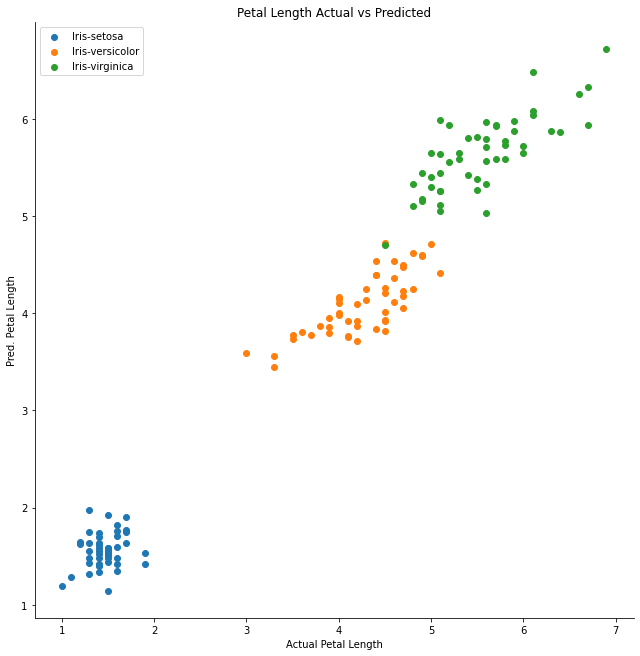

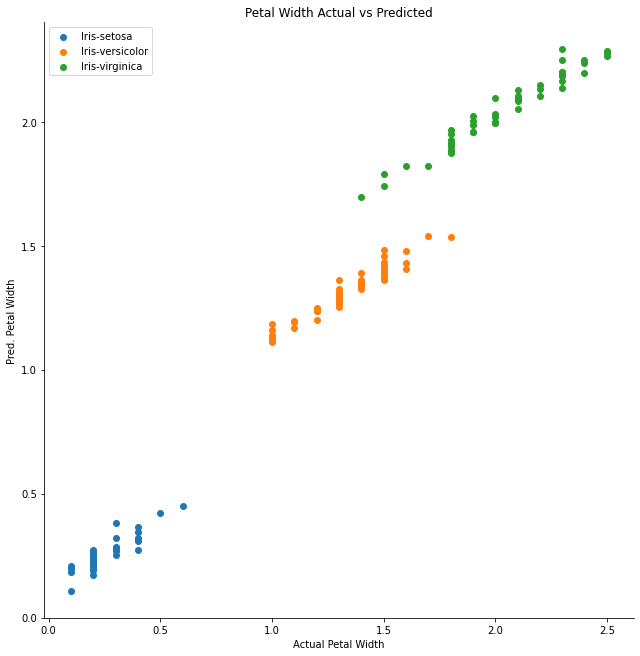

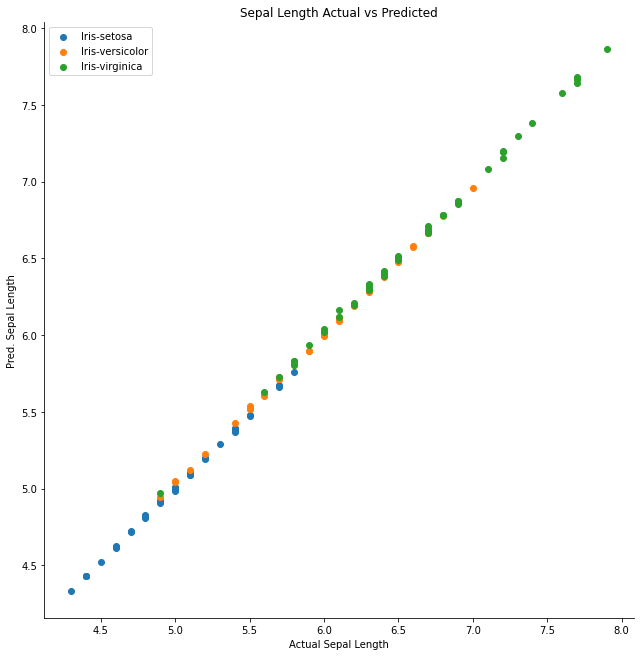

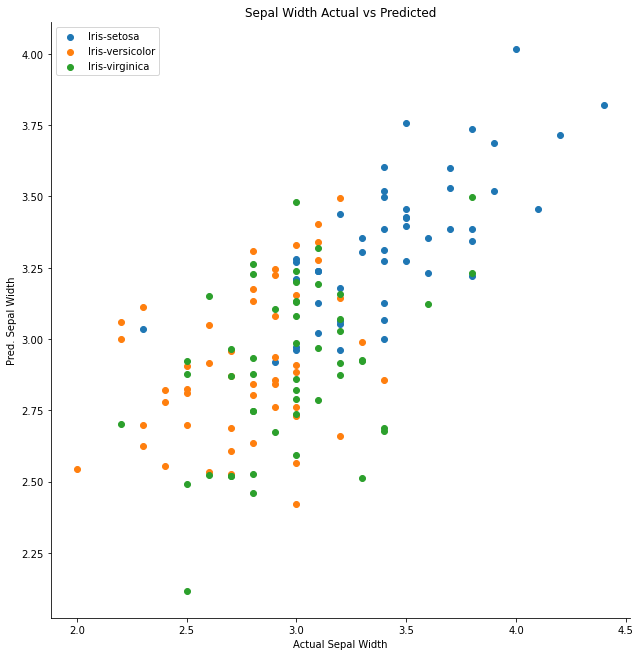

In [116]:
petalPlt = sb.FacetGrid(All_Comparisons, hue='Iris Class', size=9).map(plt.scatter, 'Actual Petal Length', 'Pred. Petal Length')
plt.legend(loc='upper left');
plt.title("Petal Length Actual vs Predicted");


petalPlt = sb.FacetGrid(All_Comparisons, hue='Iris Class', size=9).map(plt.scatter, 'Actual Petal Width', 'Pred. Petal Width')
plt.legend(loc='upper left');
plt.title("Petal Width Actual vs Predicted");


petalPlt = sb.FacetGrid(All_Comparisons, hue='Iris Class', size=9).map(plt.scatter, 'Actual Sepal Length', 'Pred. Sepal Length')
plt.legend(loc='upper left');
plt.title("Sepal Length Actual vs Predicted");


petalPlt = sb.FacetGrid(All_Comparisons, hue='Iris Class', size=9).map(plt.scatter, 'Actual Sepal Width', 'Pred. Sepal Width')
plt.legend(loc='upper left');
plt.title("Sepal Width Actual vs Predicted");


##__Logistic Regression__

Sigmoid function for logistic regression is: g(y) = 1/(1+e^-y)


In [117]:

sigmoid = lambda y: 1/(1+math.exp(-y))
classify = lambda y: 1 if y>0.5 else 0

In [146]:
#getting the right data for X and Y

class_name = [name for (_,_,_,_,name) in iris_data_set_list]
determine_the_class_number_ =  [(1) if flow == 'Iris-setosa' else (2) if flow == 'Iris-versicolor' else (3) if flow == 'Iris-virginica' else (0) for flow in class_name]
#print(determine_the_class_number_)

SL = [sss for (sss,_,_,_,_) in iris_data_set_list]
SW = [sss for (_,sss,_,_,_) in iris_data_set_list]
PL = [sss for (_,_,sss,_,_) in iris_data_set_list]
PW = [sss for (_,_,_,sss,_) in iris_data_set_list]
C =  [sss for (_,_,_,_,sss) in iris_data_set_list]

classnums_added = list(zip(SL,SW,PL,PW,C,determine_the_class_number_))
#print(classnums_added)
iris_data_set_with_classnum = pd.DataFrame(classnums_added, columns = ["sepal_length_cm", "sepal_width_cm", "petal_length_cm", "petal_width_cm", "classification", "NUM"])


#names = ['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm', 'petal_width_cm', 'classification', 'NUM'])
log_reg_columns = ['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm', 'petal_width_cm'] 

#features
X = iris_data_set_with_classnum[log_reg_columns]
Y = iris_data_set_with_classnum.NUM #target, prediciting the classification

Xlist = X.values.tolist()
Ylist = Y.values.tolist()
print(Xlist)
print(Ylist)

[[5.1, 3.5, 1.4, 0.2], [4.9, 3.0, 1.4, 0.2], [4.7, 3.2, 1.3, 0.2], [4.6, 3.1, 1.5, 0.2], [5.0, 3.6, 1.4, 0.2], [5.4, 3.9, 1.7, 0.4], [4.6, 3.4, 1.4, 0.3], [5.0, 3.4, 1.5, 0.2], [4.4, 2.9, 1.4, 0.2], [4.9, 3.1, 1.5, 0.1], [5.4, 3.7, 1.5, 0.2], [4.8, 3.4, 1.6, 0.2], [4.8, 3.0, 1.4, 0.1], [4.3, 3.0, 1.1, 0.1], [5.8, 4.0, 1.2, 0.2], [5.7, 4.4, 1.5, 0.4], [5.4, 3.9, 1.3, 0.4], [5.1, 3.5, 1.4, 0.3], [5.7, 3.8, 1.7, 0.3], [5.1, 3.8, 1.5, 0.3], [5.4, 3.4, 1.7, 0.2], [5.1, 3.7, 1.5, 0.4], [4.6, 3.6, 1.0, 0.2], [5.1, 3.3, 1.7, 0.5], [4.8, 3.4, 1.9, 0.2], [5.0, 3.0, 1.6, 0.2], [5.0, 3.4, 1.6, 0.4], [5.2, 3.5, 1.5, 0.2], [5.2, 3.4, 1.4, 0.2], [4.7, 3.2, 1.6, 0.2], [4.8, 3.1, 1.6, 0.2], [5.4, 3.4, 1.5, 0.4], [5.2, 4.1, 1.5, 0.1], [5.5, 4.2, 1.4, 0.2], [4.9, 3.1, 1.5, 0.1], [5.0, 3.2, 1.2, 0.2], [5.5, 3.5, 1.3, 0.2], [4.9, 3.1, 1.5, 0.1], [4.4, 3.0, 1.3, 0.2], [5.1, 3.4, 1.5, 0.2], [5.0, 3.5, 1.3, 0.3], [4.5, 2.3, 1.3, 0.3], [4.4, 3.2, 1.3, 0.2], [5.0, 3.5, 1.6, 0.6], [5.1, 3.8, 1.9, 0.4], [4.8, 3.0

In [183]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.75,random_state=0)

In [184]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model 
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

For confusion matrix based on test set of 75% of total sets

In [185]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[38,  0,  0],
       [ 0, 37,  0],
       [ 0,  8, 30]])

Text(0.5, 15.0, 'Predicted class')

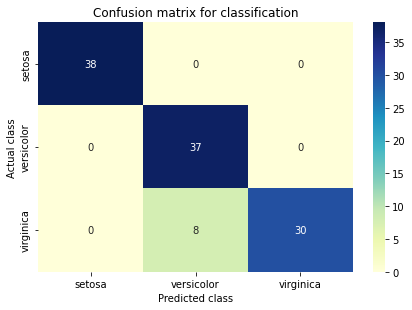

In [186]:
class_names_= ['setosa','versicolor', 'virginica'] # name  of classifications
fig, ax = plt.subplots()

#fig, ax = plt.subplots()
# create heatmap
sb.heatmap(pd.DataFrame(cnf_matrix), xticklabels=class_names_, yticklabels=class_names_, annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("bottom")
plt.tight_layout()
plt.title('Confusion matrix for classification', Y=1)
plt.ylabel('Actual class')
plt.xlabel('Predicted class')


Mean squared error

In [190]:
logRegMSE = LogisticRegression(solver='liblinear', C= 10, random_state=0)
logRegMSE.fit(X,Y)
logRegMSE.predict_log_proba(X)

array([[-9.69988269e-02, -2.38116381e+00, -2.26329992e+01],
       [-2.35987809e-01, -1.55964969e+00, -2.06363815e+01],
       [-1.53273528e-01, -1.95118928e+00, -2.10508018e+01],
       [-2.12281512e-01, -1.65410583e+00, -1.96165949e+01],
       [-7.82929591e-02, -2.58618869e+00, -2.26392369e+01],
       [-3.67019590e-02, -3.32322001e+00, -2.22130136e+01],
       [-9.24984737e-02, -2.42645592e+00, -2.03153656e+01],
       [-1.28075870e-01, -2.11848701e+00, -2.16193128e+01],
       [-2.66081596e-01, -1.45404485e+00, -1.89163997e+01],
       [-2.53452247e-01, -1.49663082e+00, -2.10863500e+01],
       [-7.24428129e-02, -2.66096057e+00, -2.36476206e+01],
       [-1.37446322e-01, -2.05245797e+00, -2.06081623e+01],
       [-2.72591333e-01, -1.43298305e+00, -2.09523009e+01],
       [-2.13993160e-01, -1.64690049e+00, -2.07968411e+01],
       [-2.90173146e-02, -3.55433614e+00, -2.70218935e+01],
       [-9.81320977e-03, -4.62892846e+00, -2.54960324e+01],
       [-2.44023661e-02, -3.72525155e+00

In [191]:
logRegMSE.coef_

array([[ 0.65087962,  2.25102715, -3.49573723, -1.6202929 ],
       [ 0.10444407, -2.35454857,  1.06418853, -2.40441749],
       [-2.86845641, -3.11540512,  4.44871415,  5.65618308]])

In [192]:
logRegMSE.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3,
       3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

####confusion matrix on all 150 data points


In [193]:
confusion_matrix(Y, logRegMSE.predict(X))

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  2, 48]])

CrossEntropy = sum([ r*log((y)) for r,y in zip(Y, yPredicted)]) 

we will have to use this for the cross entropy gradient